<a href="https://colab.research.google.com/github/hblacksmith/Clustering/blob/main/MSc_DTS_ML_Classifier_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [242]:
#Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [243]:
# Import dataset
data = pd.read_csv('AppData.csv', encoding='ISO-8859–1')

In [244]:
data.head()

,Ref,Candidate,text,Cosine Similarity,Soft Cosine,Score
0,AppData1,3620013,"During my RAF cadet journey, I had to demonstr...",0.392927,0.61,REJECT
1,AppData2,3621201,As I have worked in my role at M&S for over 2 ...,0.424385,0.62,REJECT
2,AppData3,3624197,I drive my team with great confidence and a he...,0.388232,0.61,REJECT
3,AppData4,3624416,"Although I am not in a leadership position, I ...",0.315489,0.57,REJECT
4,AppData5,3625604,When I worked at Stansted Airport in the speci...,0.368704,0.60,REJECT


In [245]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Ref                24 non-null     object 
 1   Candidate          24 non-null     int64  
 2   text               24 non-null     object 
 3   Cosine Similarity  24 non-null     float64
 4   Soft Cosine        24 non-null     float64
 5   Score              24 non-null     object 
dtypes: float64(2), int64(1), object(3)
memory usage: 1.2+ KB


In [246]:
data.Score.value_counts()

REJECT    20
PASS       4
Name: Score, dtype: int64

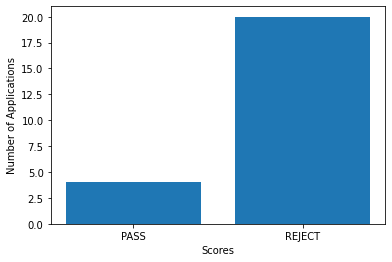

In [247]:
Score_count=data.groupby('Score').count()
plt.bar(Score_count.index.values, Score_count['Ref'])
plt.xlabel('Scores')
plt.ylabel('Number of Applications')
plt.show()

In [248]:
#Feature Generation using Bag of Words 
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

#tokenizer to remove unwanted elements from data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize) 
text_counts= cv.fit_transform(data['text'])

In [249]:
#Split train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text_counts, data['Score'], test_size=0.25, random_state=0)

In [250]:
# Model Building and Evaluation - Naive Bayes
from sklearn.naive_bayes import MultinomialNB

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:", metrics.accuracy_score(y_test, predicted))

In [251]:
# Model Building and Evaluation - SVM
from sklearn.svm import LinearSVC
from sklearn import metrics
clf = LinearSVC().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("LinearSVC Accuracy:", metrics.accuracy_score(y_test, predicted))

LinearSVC Accuracy: 0.8333333333333334


In [263]:
print(clf.predict(sc.transform([[AppData5,0.368704]])))

NameError: ignored

In [252]:
# Model Building and Evaluation - Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
clf = RandomForestClassifier().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("RandomForestClassifier Accuracy:", metrics.accuracy_score(y_test, predicted))

RandomForestClassifier Accuracy: 0.8333333333333334


In [253]:
# Model Building and Evaluation - Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
clf = DecisionTreeClassifier(criterion = 'entropy', random_state = 0).fit(X_train, y_train)
predicted= clf.predict(X_test)
print("DecisionTreeClassifier:", metrics.accuracy_score(y_test, predicted))

DecisionTreeClassifier: 0.8333333333333334


In [254]:
# Model Building and Evaluation - Logistic Regression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
predicted= clf.predict(X_test)
print("LogisticRegression Accuracy:", metrics.accuracy_score(y_test, predicted))

LogisticRegression Accuracy: 0.8333333333333334


In [255]:
# Feature Generation using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
text_tf= tf.fit_transform(data['text'])

In [256]:
#Split train and test set (TF-IDF)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text_tf, data['Score'], test_size=0.3, random_state=123)

In [257]:
#Model Building and Evaluation (TF-IDF)
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted = clf.predict(X_test)
print("MultinomialNB Accuracy:", metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.625


In [258]:
#Model Building and Evaluation (TF-IDF) SVM
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

# Model Generation Using Multinomial Naive Bayes
clf = LinearSVC().fit(X_train, y_train)
predicted = clf.predict(X_test)
print("LinearSVC Accuracy:", metrics.accuracy_score(y_test, predicted))

LinearSVC Accuracy: 0.625


In [259]:
#Model Building and Evaluation (TF-IDF) Kernel SVM
from sklearn.svm import SVC
from sklearn import metrics

# Model Generation Using Multinomial Naive Bayes
clf = SVC(kernel = 'rbf', random_state = 0).fit(X_train, y_train)
predicted = clf.predict(X_test)
print("Kernel SVM:", metrics.accuracy_score(y_test, predicted))

Kernel SVM: 0.625
